# House Prices: Advanced Regression Techniques
## Author: Adam Novotny

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import outputs
from sklearn import preprocessing

## Load Data

In [2]:
df_train = pd.read_csv("data/train.csv", header=0, index_col=0)
df_train.index = range(len(df_train))
df_test = pd.read_csv("data/test.csv", header=0, index_col=0)
df_test.index = range(len(df_test))

## Exploration

In [3]:
missing = pd.DataFrame(df_train.isnull().sum(), columns = ["missing"])
missing["df_type"] = df_train.dtypes
print("| Column | Type | Missing Values |")
print("| --- | --- | --- |")
for i, row in missing.iterrows():
    print("| {0} | {1} | {2} |".format(i, row["df_type"], row["missing"]))

| Column | Type | Missing Values |
| --- | --- | --- |
| MSSubClass | int64 | 0 |
| MSZoning | object | 0 |
| LotFrontage | float64 | 259 |
| LotArea | int64 | 0 |
| Street | object | 0 |
| Alley | object | 1369 |
| LotShape | object | 0 |
| LandContour | object | 0 |
| Utilities | object | 0 |
| LotConfig | object | 0 |
| LandSlope | object | 0 |
| Neighborhood | object | 0 |
| Condition1 | object | 0 |
| Condition2 | object | 0 |
| BldgType | object | 0 |
| HouseStyle | object | 0 |
| OverallQual | int64 | 0 |
| OverallCond | int64 | 0 |
| YearBuilt | int64 | 0 |
| YearRemodAdd | int64 | 0 |
| RoofStyle | object | 0 |
| RoofMatl | object | 0 |
| Exterior1st | object | 0 |
| Exterior2nd | object | 0 |
| MasVnrType | object | 8 |
| MasVnrArea | float64 | 8 |
| ExterQual | object | 0 |
| ExterCond | object | 0 |
| Foundation | object | 0 |
| BsmtQual | object | 37 |
| BsmtCond | object | 37 |
| BsmtExposure | object | 38 |
| BsmtFinType1 | object | 37 |
| BsmtFinSF1 | int64 | 0 |
| Bsmt

In [4]:
with open('data/data_description.txt', 'r') as f:
    lines = f.readlines()
    text = ''.join(lines)
    print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
categorical_columns = ["MSSubClass"]
quant_columns = []

### Numerical

In [6]:
for i, row in missing.iterrows():
    if (row["df_type"] == "int64" or row["df_type"] == "float64") and i not in categorical_columns and i not in quant_columns:
        quant_columns.append(i)
df_quants = df_train.loc[:,quant_columns].describe()
df_quants

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


LotFrontage


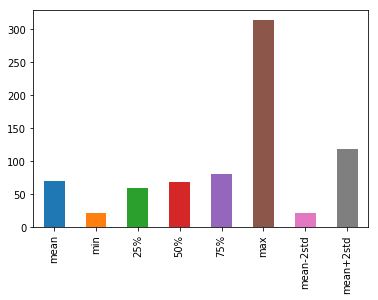

LotArea


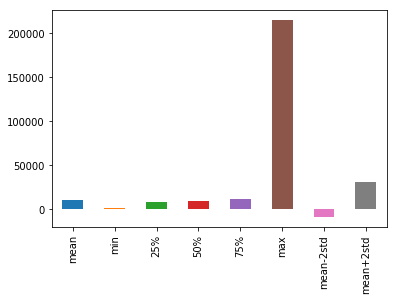

OverallQual


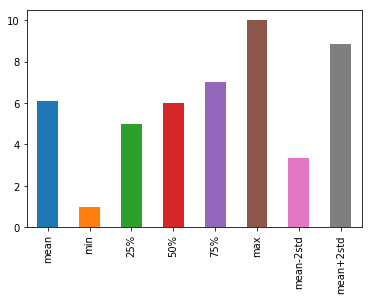

OverallCond


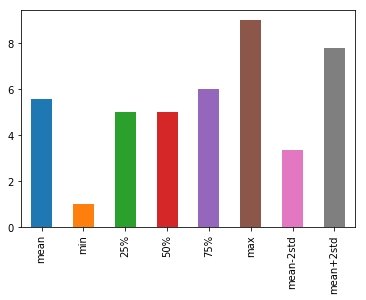

YearBuilt


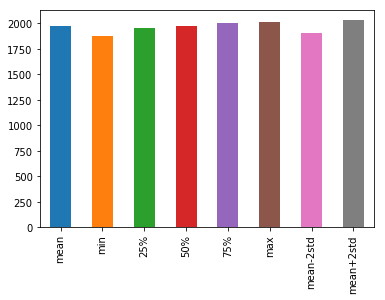

YearRemodAdd


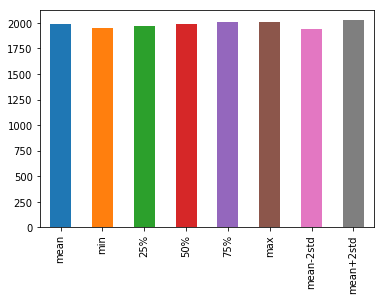

MasVnrArea


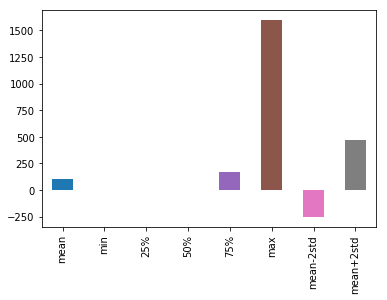

BsmtFinSF1


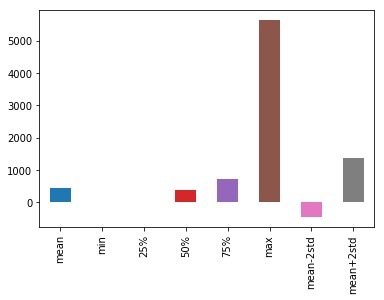

BsmtFinSF2


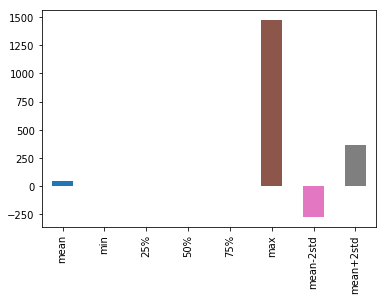

BsmtUnfSF


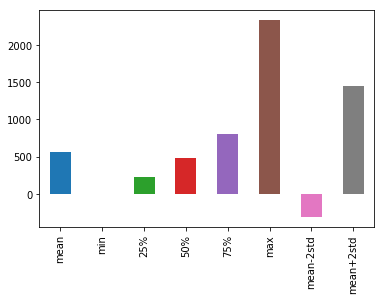

TotalBsmtSF


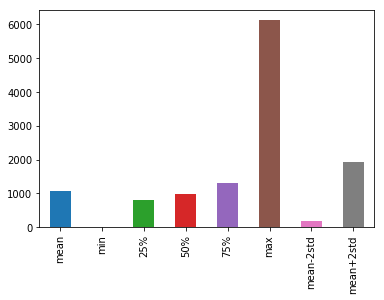

1stFlrSF


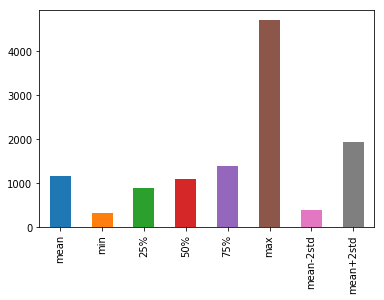

2ndFlrSF


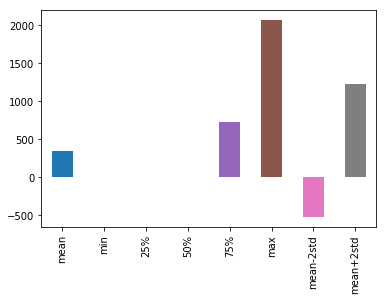

LowQualFinSF


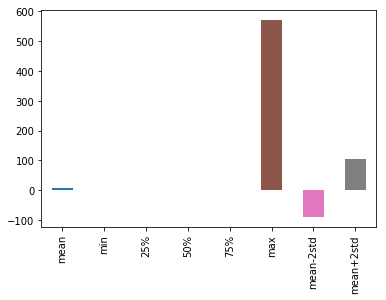

GrLivArea


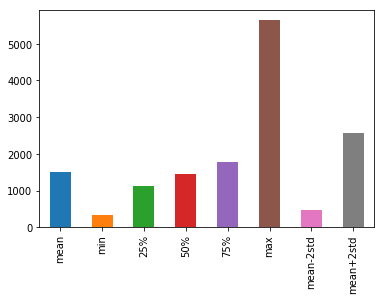

BsmtFullBath


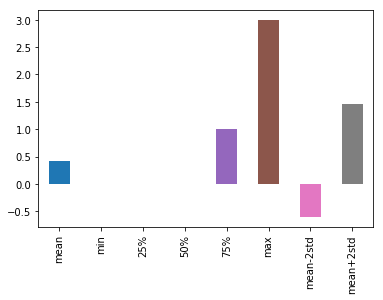

BsmtHalfBath


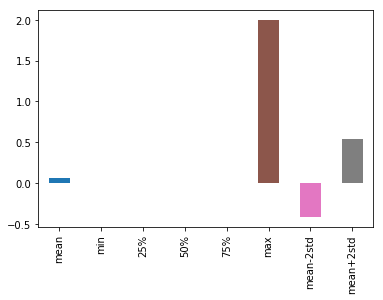

FullBath


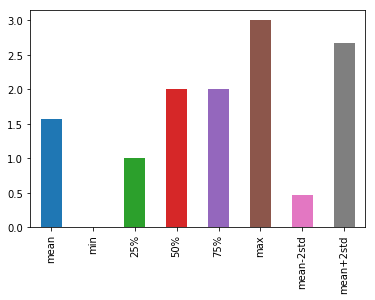

HalfBath


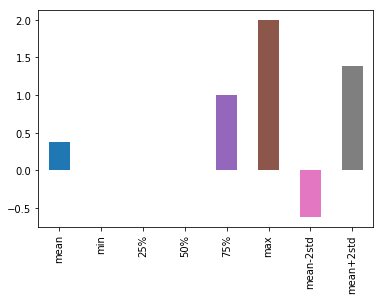

BedroomAbvGr


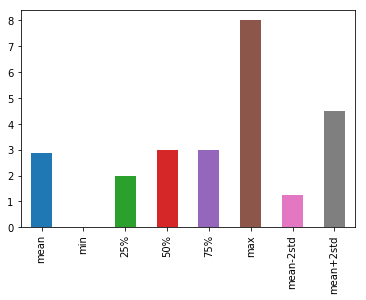

KitchenAbvGr


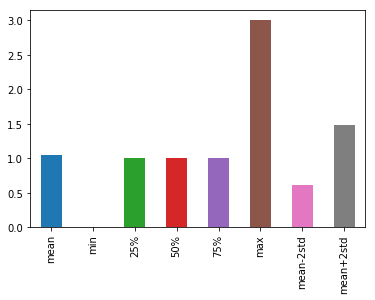

TotRmsAbvGrd


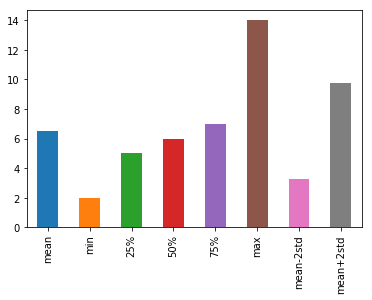

Fireplaces


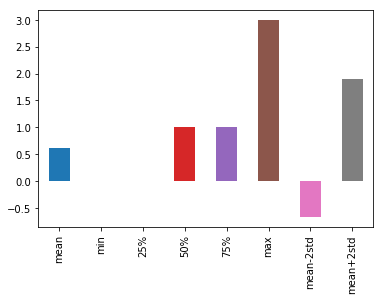

GarageYrBlt


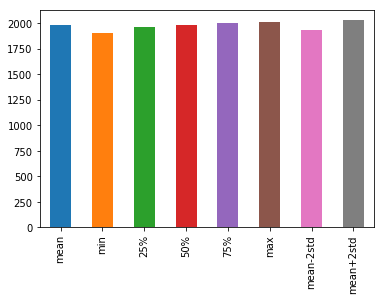

GarageCars


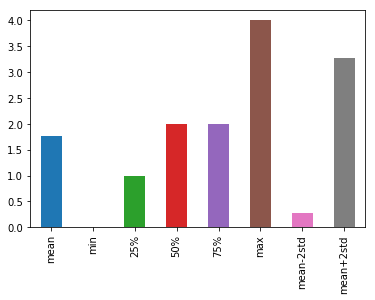

GarageArea


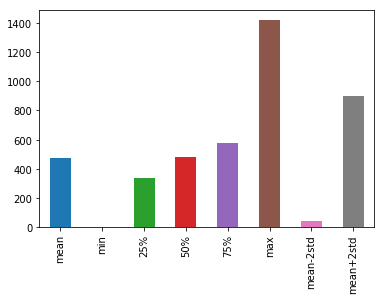

WoodDeckSF


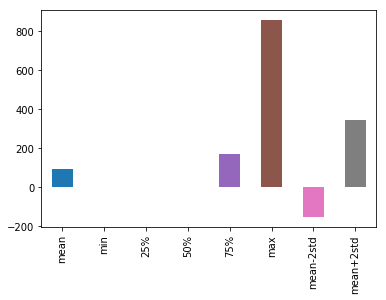

OpenPorchSF


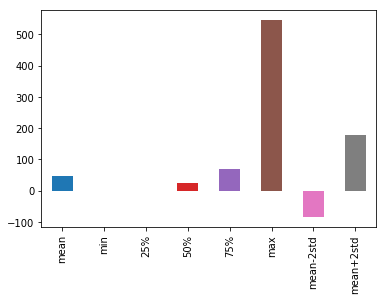

EnclosedPorch


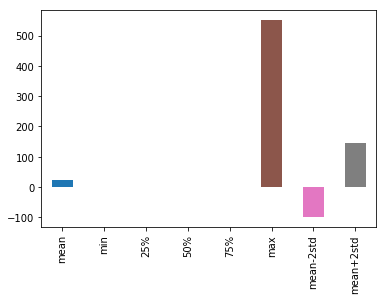

3SsnPorch


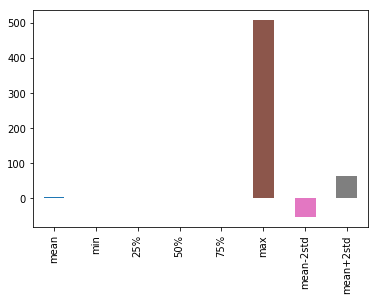

ScreenPorch


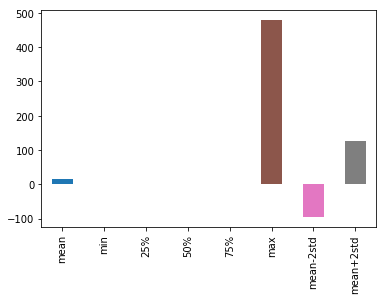

PoolArea


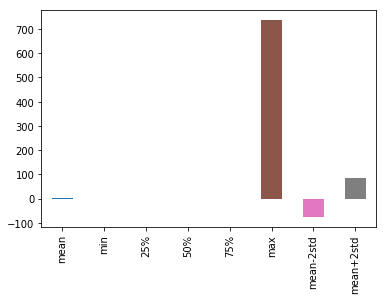

MiscVal


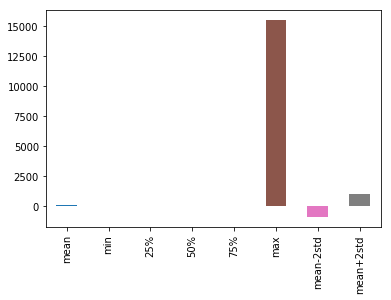

MoSold


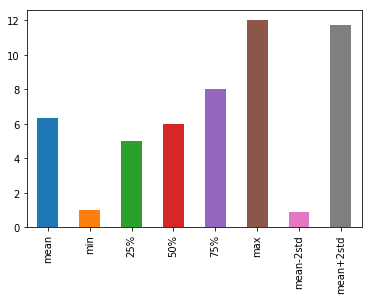

YrSold


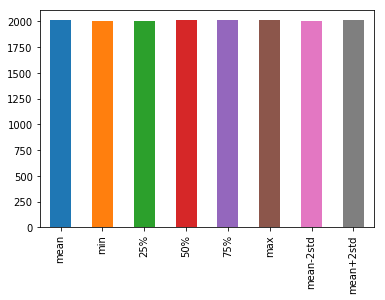

SalePrice


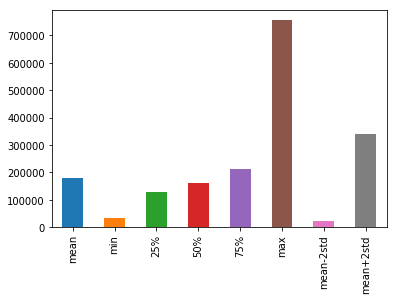

In [7]:
df_quants.loc["mean-2std",:] = df_quants.loc["mean",:] - 2 * df_quants.loc["std",:]
df_quants.loc["mean+2std",:] = df_quants.loc["mean",:] + 2 * df_quants.loc["std",:]
df_index_exclude = df_quants.index.isin(["std", "count"])
for i in df_quants.columns:
    print(i)
    df_quants.loc[~df_index_exclude,i].plot(kind="bar")
    plt.show()

### Categorical

Sale price grouped by ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
MSSubClass


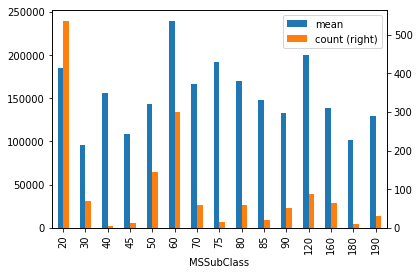

MSZoning


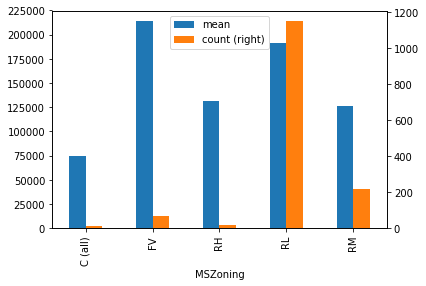

Street


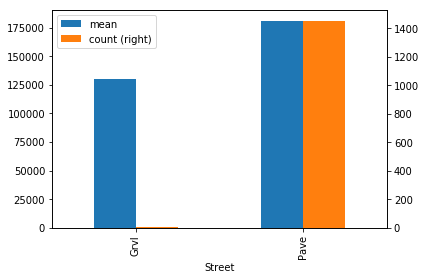

Alley


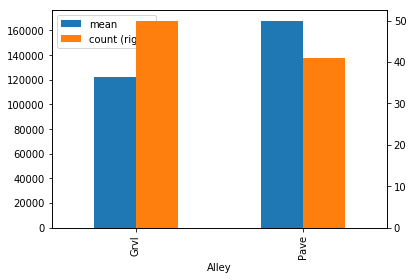

LotShape


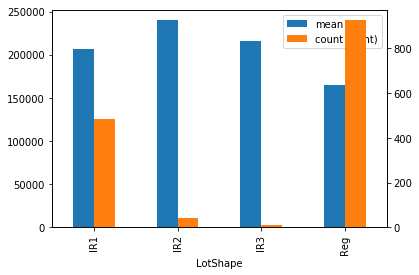

LandContour


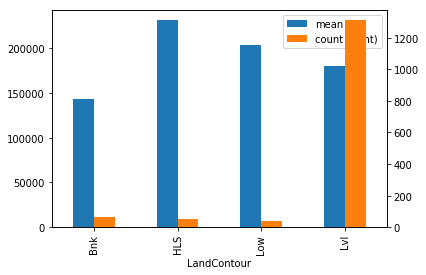

Utilities


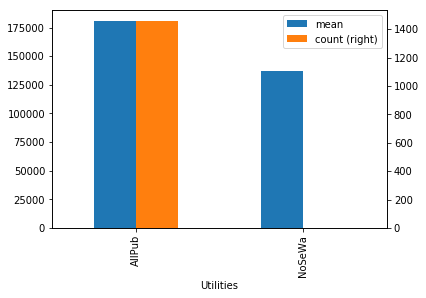

LotConfig


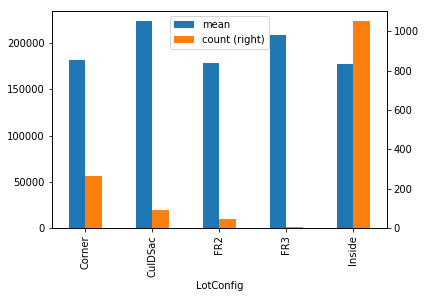

LandSlope


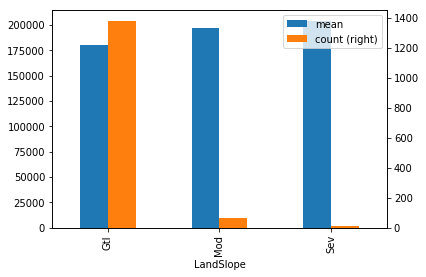

Neighborhood


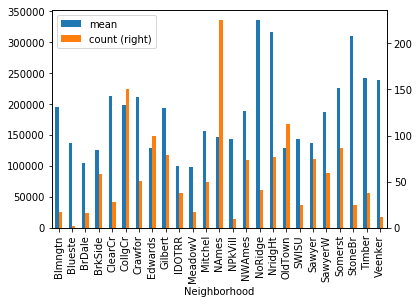

Condition1


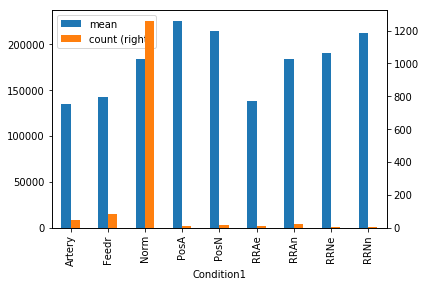

Condition2


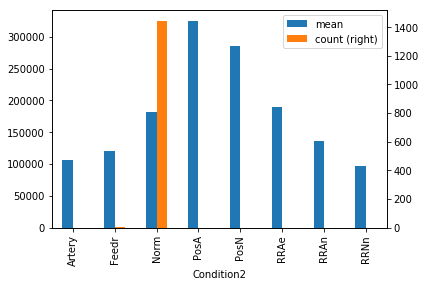

BldgType


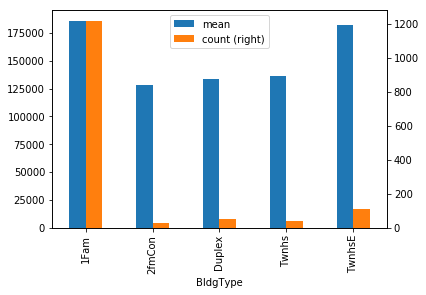

HouseStyle


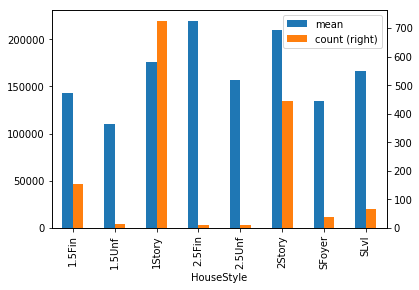

RoofStyle


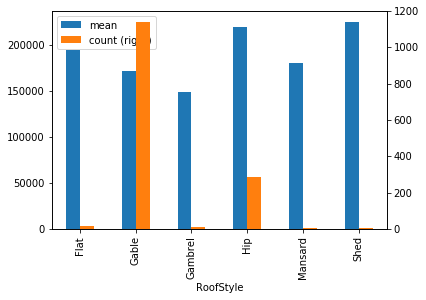

RoofMatl


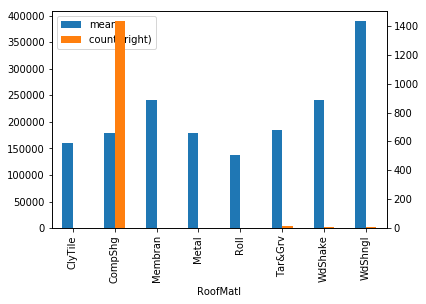

Exterior1st


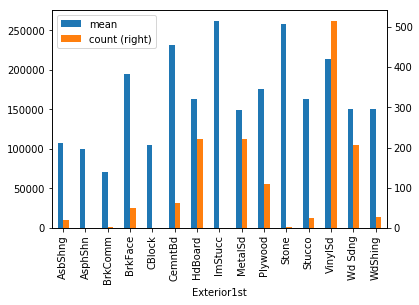

Exterior2nd


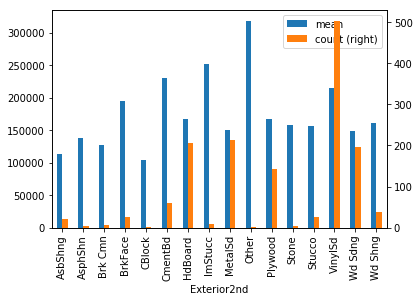

MasVnrType


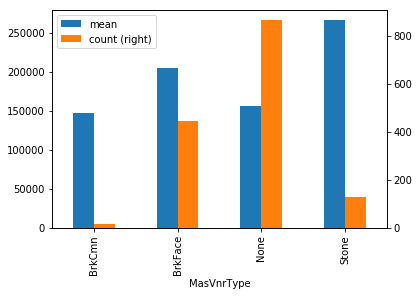

ExterQual


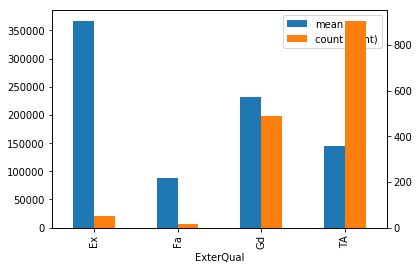

ExterCond


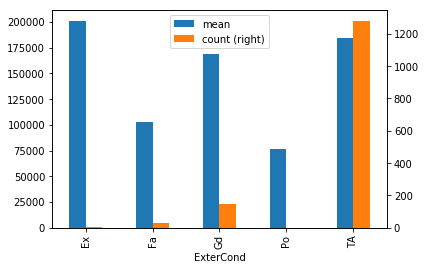

Foundation


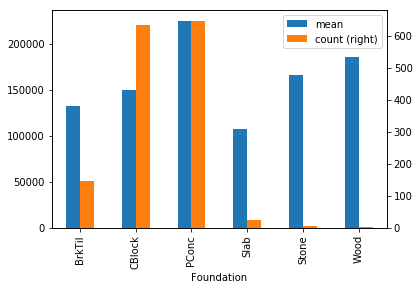

BsmtQual


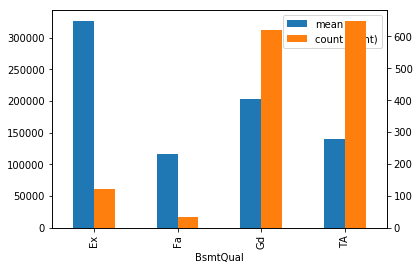

BsmtCond


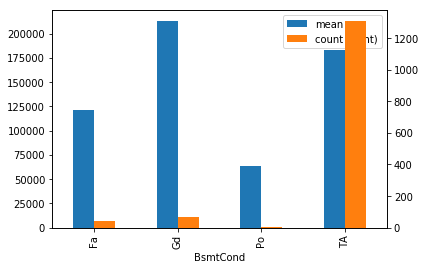

BsmtExposure


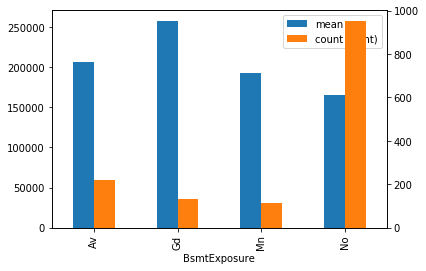

BsmtFinType1


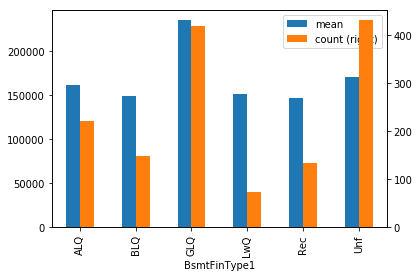

BsmtFinType2


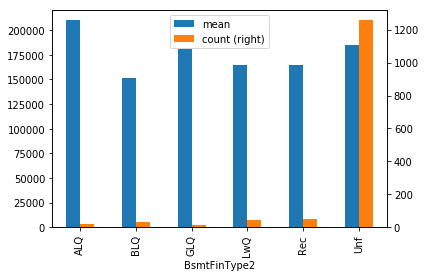

Heating


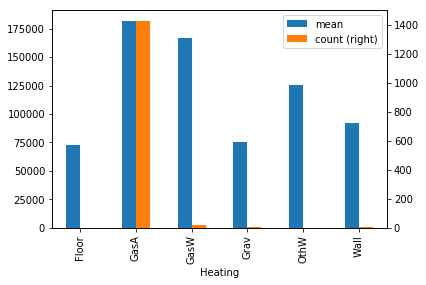

HeatingQC


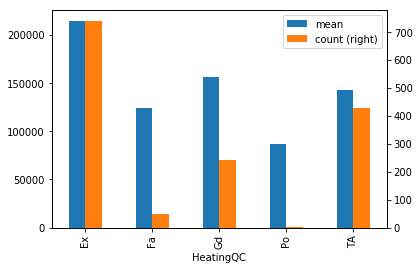

CentralAir


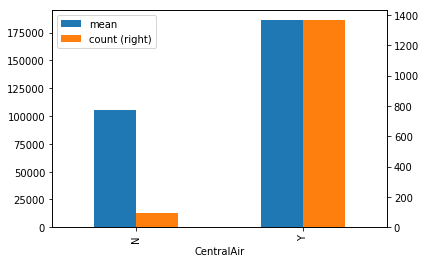

Electrical


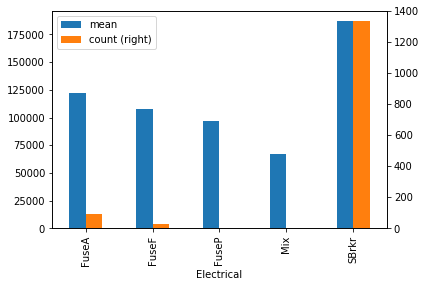

KitchenQual


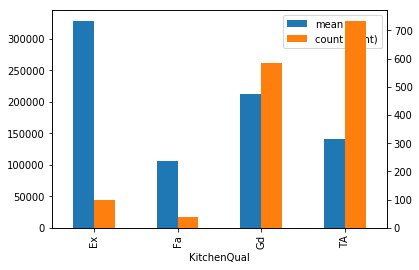

Functional


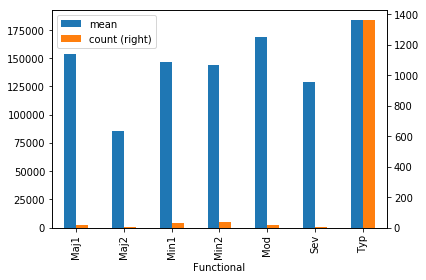

FireplaceQu


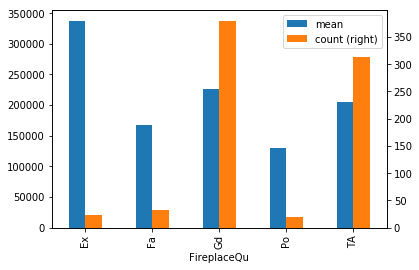

GarageType


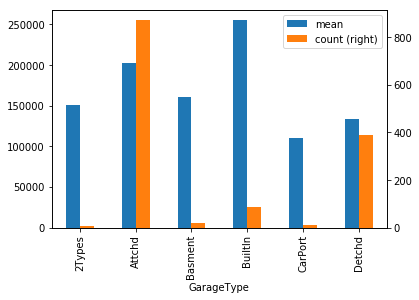

GarageFinish


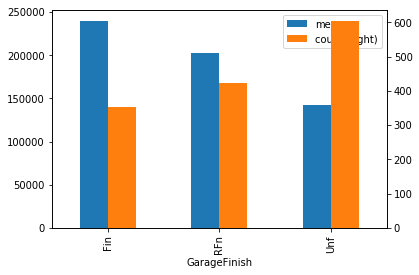

GarageQual


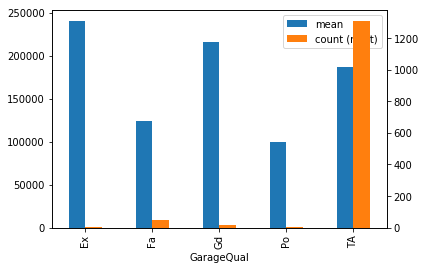

GarageCond


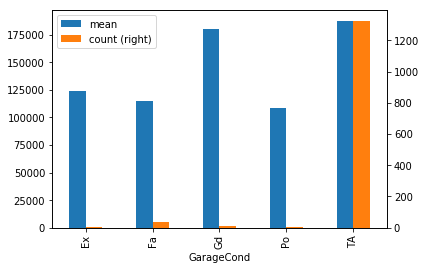

PavedDrive


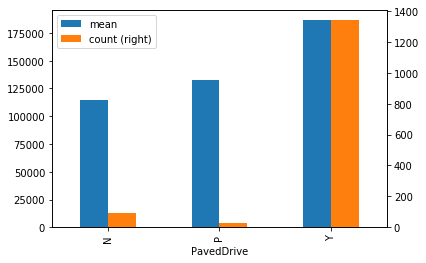

PoolQC


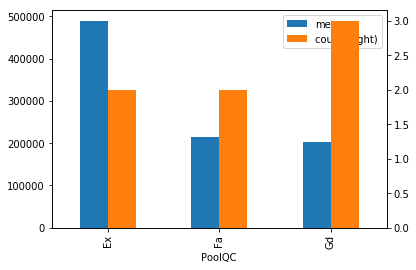

Fence


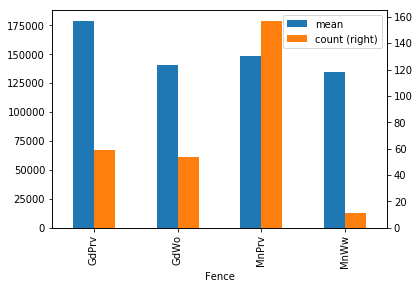

MiscFeature


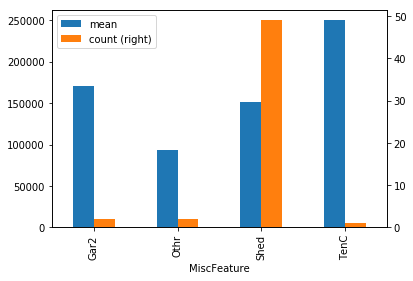

SaleType


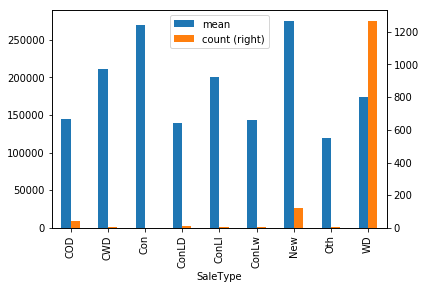

SaleCondition


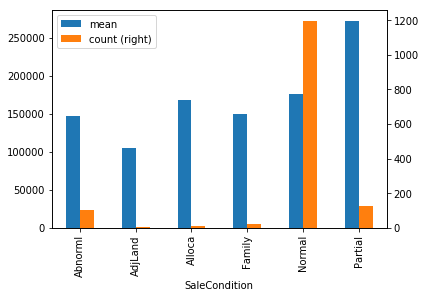

In [8]:
for i, row in missing.iterrows():
    if row["df_type"] == "object" and i not in categorical_columns and i not in quant_columns:
        categorical_columns.append(i)
print("Sale price grouped by {}".format(categorical_columns))
for i in categorical_columns:
    ag = df_train.groupby(i)["SalePrice"].agg(["mean", "count"])
    ag.plot(kind="bar", secondary_y="count")
    print(i)
    plt.show()

## Preprocessing - Train Data

In [9]:
cols_drop = ["Alley"]
for i in cols_drop:
    if i in df_train:
        df_train = df_train.drop(columns=i)
    if i in categorical_columns:
        categorical_columns.remove(i)

### Missing Values

In [10]:
missing_values_cols = {
    "LotFrontage": df_train["LotFrontage"].median(),
    "MasVnrType": "None", 
    "BsmtQual": "NA", 
    "BsmtCond": "NA", 
    "BsmtExposure": "NA",
    "BsmtFinType1": "NA", 
    "BsmtFinType2": "NA",
    "Electrical": df_train["Electrical"].value_counts().index[0],
    "FireplaceQu": "TA", 
    "GarageType": df_train["GarageType"].value_counts().index[0],
    "GarageFinish": df_train["GarageFinish"].value_counts().index[0],
    "GarageQual": "TA", 
    "GarageCond": "TA",
    "GarageYrBlt": df_train["YearBuilt"],
    "MasVnrArea": 0,
    "PoolQC": "NA", 
    "Fence": "NA", 
    "MiscFeature": "NA"}
df_train = df_train.fillna(value=missing_values_cols)
# check fills
missing = pd.DataFrame(df_train.isnull().sum(), columns = ["missing"])
for i in missing_values_cols:
    assert 0 == df_train[i].isnull().sum()

### Categorical Cols

In [11]:
# encode categorical columns
import preprocess
df_train_enc = preprocess.encode_data(df_train, categorical_columns)
df_train_enc

Converting column MSSubClass
Converting column MSZoning
Converting column Street
Converting column LotShape
Converting column LandContour
Converting column Utilities
Converting column LotConfig
Converting column LandSlope
Converting column Neighborhood
Converting column Condition1
Converting column Condition2
Converting column BldgType
Converting column HouseStyle
Converting column RoofStyle
Converting column RoofMatl
Converting column Exterior1st
Converting column Exterior2nd
Converting column MasVnrType
Converting column ExterQual
Converting column ExterCond
Converting column Foundation
Converting column BsmtQual
Converting column BsmtCond
Converting column BsmtExposure
Converting column BsmtFinType1
Converting column BsmtFinType2
Converting column Heating
Converting column HeatingQC
Converting column CentralAir
Converting column Electrical
Converting column KitchenQual
Converting column Functional
Converting column FireplaceQu
Converting column GarageType
Converting column GarageFin

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,85.0,14115,5,5,1993,1995,0.0,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,75.0,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,69.0,10382,7,6,1973,1973,240.0,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,51.0,6120,7,5,1931,1950,0.0,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,50.0,7420,5,6,1939,1950,0.0,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [12]:
df_train_enc.to_csv("data/train_clean.csv", header=True, index=True)

## Preprocessing - Test Data

In [13]:
# remove columns
cols_drop = ["Alley"]
for i in cols_drop:
    if i in df_test:
        df_test = df_test.drop(columns=i)
    if i in categorical_columns:
        categorical_columns.remove(i)

In [14]:
# missing values
df_test = df_test.fillna(value=missing_values_cols)
# check fills
missing = pd.DataFrame(df_test.isnull().sum(), columns = ["missing"])
for i in missing_values_cols:
    assert 0 == df_train[i].isnull().sum()

In [15]:
# check additional missing data
missing = pd.DataFrame(df_test.isnull().sum(), columns = ["missing"])
missing["df_type"] = df_train.dtypes
print("| Column | Type | Missing Values |")
print("| --- | --- | --- |")
for i, row in missing.iterrows():
    print("| {0} | {1} | {2} |".format(i, row["df_type"], row["missing"]))

| Column | Type | Missing Values |
| --- | --- | --- |
| MSSubClass | int64 | 0 |
| MSZoning | object | 4 |
| LotFrontage | float64 | 0 |
| LotArea | int64 | 0 |
| Street | object | 0 |
| LotShape | object | 0 |
| LandContour | object | 0 |
| Utilities | object | 2 |
| LotConfig | object | 0 |
| LandSlope | object | 0 |
| Neighborhood | object | 0 |
| Condition1 | object | 0 |
| Condition2 | object | 0 |
| BldgType | object | 0 |
| HouseStyle | object | 0 |
| OverallQual | int64 | 0 |
| OverallCond | int64 | 0 |
| YearBuilt | int64 | 0 |
| YearRemodAdd | int64 | 0 |
| RoofStyle | object | 0 |
| RoofMatl | object | 0 |
| Exterior1st | object | 1 |
| Exterior2nd | object | 1 |
| MasVnrType | object | 0 |
| MasVnrArea | float64 | 0 |
| ExterQual | object | 0 |
| ExterCond | object | 0 |
| Foundation | object | 0 |
| BsmtQual | object | 0 |
| BsmtCond | object | 0 |
| BsmtExposure | object | 0 |
| BsmtFinType1 | object | 0 |
| BsmtFinSF1 | int64 | 1 |
| BsmtFinType2 | object | 0 |
| BsmtFi

In [16]:
missing_values_cols_test_only = {
    "MSZoning": df_train["MSZoning"].value_counts().index[0],
    "Utilities": df_train["Utilities"].value_counts().index[0],
    "Exterior1st": df_train["Exterior1st"].value_counts().index[0],
    "Exterior2nd": df_train["Exterior2nd"].value_counts().index[0],
    "BsmtFinSF1": df_train["BsmtFinSF1"].median(),
    "BsmtFinSF2": df_train["BsmtFinSF2"].median(),
    "BsmtUnfSF": df_train["BsmtUnfSF"].median(),
    "TotalBsmtSF": df_train["TotalBsmtSF"].median(),
    "BsmtFullBath": df_train["BsmtFullBath"].median(),
    "BsmtHalfBath": df_train["BsmtHalfBath"].median(),
    "KitchenQual": df_train["KitchenQual"].value_counts().index[0],
    "Functional": df_train["Functional"].value_counts().index[0],
    "GarageCars": df_train["GarageCars"].median(),
    "GarageArea": df_train["GarageArea"].median(),
    "SaleType": df_train["SaleType"].value_counts().index[0]
}
df_test = df_test.fillna(value=missing_values_cols_test_only)
# check fills
missing = pd.DataFrame(df_test.isnull().sum(), columns = ["missing"])
for i in missing_values_cols_test_only:
    assert 0 == df_train[i].isnull().sum()

In [17]:
# encode categorical
df_test_enc = preprocess.encode_data(df_test, categorical_columns)
df_test_enc

Converting column MSSubClass
Converting column MSZoning
Converting column Street
Converting column LotShape
Converting column LandContour
Converting column Utilities
Converting column LotConfig
Converting column LandSlope
Converting column Neighborhood
Converting column Condition1
Converting column Condition2
Converting column BldgType
Converting column HouseStyle
Converting column RoofStyle
Converting column RoofMatl
Converting column Exterior1st
Converting column Exterior2nd
Converting column MasVnrType
Converting column ExterQual
Converting column ExterCond
Converting column Foundation
Converting column BsmtQual
Converting column BsmtCond
Converting column BsmtExposure
Converting column BsmtFinType1
Converting column BsmtFinType2
Converting column Heating
Converting column HeatingQC
Converting column CentralAir
Converting column Electrical
Converting column KitchenQual
Converting column Functional
Converting column FireplaceQu
Converting column GarageType
Converting column GarageFin

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
5,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,...,0,0,0,1,0,0,0,0,1,0
6,69.0,7980,6,7,1992,2007,0.0,935.0,0.0,233.0,...,0,0,0,1,0,0,0,0,1,0
7,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,789.0,...,0,0,0,1,0,0,0,0,1,0
8,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,663.0,...,0,0,0,1,0,0,0,0,1,0
9,70.0,8400,4,5,1970,1970,0.0,804.0,78.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# fill empty columns to test dataset
fill_empty = {
    "Utilities_NoSeWa": 0,
    "Condition2_RRAe": 0,
    "Condition2_RRAn": 0,
    "Condition2_RRNn": 0,
    "HouseStyle_2.5Fin": 0,
    "HouseStyle_2": 0,
    "RoofMatl_ClyTile": 0,
    "RoofMatl_Membran": 0,
    "RoofMatl_Metal": 0,
    "RoofMatl_Roll": 0,
    "Exterior1st_ImStucc": 0,
    "Exterior1st_Stone": 0,
    "Exterior2nd_Other": 0,
    "Heating_Floor": 0,
    "Heating_OthW": 0,
    "Electrical_Mix": 0,
    "GarageQual_Ex": 0,
    "PoolQC_Fa": 0,
    "MiscFeature_TenC": 0
}
for i in df_train_enc.columns:
    if i not in df_test_enc.columns and i != "SalePrice":
        df_test_enc[i] = fill_empty[i]

In [19]:
# remove columns no in train dataset
for i in df_test_enc.columns:
    if i not in df_train_enc.columns:
        df_test_enc = df_test_enc.drop(labels=[i], axis=1)

In [20]:
# check sizes
assert len(df_test_enc.columns) + 1 == len(df_train_enc.columns) # train include SalePrice

In [21]:
df_test_enc.to_csv("data/test_clean.csv", header=True, index=True)